In [1]:
# prompt: import libraries for ML, visulization, data engineering, data selection,

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from google.colab import drive
%matplotlib
pd.pandas.set_option('display.max_columns', None)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#This dataset is taken after feature engineering
dataset=pd.read_csv('/content/drive/Shareddrives/CyberSecurity Dataset/UNSW-NB15 - CSV Files/Feature engineering dataset/UNSWNB feature engineering.csv')

In [ ]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=20)
X = selector.fit_transform(X, y)

In [ ]:
# get the list of selected features
selected_features_mask = selector.get_support()
selected_features = list(data1.columns[selected_features_mask])
print(selected_features)

In [ ]:
# Specify the target variable (output or class)
target_column = 'attack_cat'  # Replace with the actual name of your target column


In [ ]:
# Specify the features and drop 'id' and 'label' columns
features = df.drop(columns=['id', 'label', target_column])

In [ ]:
# Specify the target variable
target = df[target_column]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# NEW Section
# DNN Model

In [ ]:
# Build DNN model
dnn_model = Sequential()
dnn_model.add(Dense(units=64, activation='relu', input_dim=20))
dnn_model.add(Dense(units=32, activation='relu'))
dnn_model.add(Dense(units=10, activation='softmax'))
dnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# this is because of the binary or multicalss classification
#dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train DNN model
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
dnn_model.fit(X_train, pd.get_dummies(y_train), validation_data=(X_test, pd.get_dummies(y_test)), epochs=50, batch_size=32, callbacks=[early_stop])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6442/6442 [==============================] - 19s 3ms/step - loss: 0.5575 - accuracy: 0.8001 - val_loss: 0.5026 - val_accuracy: 0.8180
Epoch 2/50
6442/6442 [==============================] - 16s 2ms/step - loss: 0.4955 - accuracy: 0.8177 - val_loss: 0.4929 - val_accuracy: 0.8208
Epoch 3/50
6442/6442 [==============================] - 16s 2ms/step - loss: 0.4810 - accuracy: 0.8216 - val_loss: 0.4775 - val_accuracy: 0.8227
Epoch 4/50
6442/6442 [==============================] - 21s 3ms/step - loss: 0.4725 - accuracy: 0.8238 - val_loss: 0.4827 - val_accuracy: 0.8192
Epoch 5/50
6442/6442 [==============================] - 18s 3ms/step - loss: 0.4672 - accuracy: 0.8252 - val_loss: 0.4607 - val_accuracy: 0.8283
Epoch 6/50
6442/6442 [==============================] - 16s 2ms/step - loss: 0.4631 - accuracy: 0.8263 - val_loss: 0.4614 - val_accuracy: 0.8279
Epoch 7/50
6442/6442 [==============================] - 15s 2ms/step - loss: 0.4595 - accuracy: 0.8266 - val_loss: 0.4563 - val_accuracy: 0.8

In [ ]:
# Print the input shape of the DNN model
print("Input shape of DNN model:", dnn_model.layers[0].input_shape)

Input shape of DNN model: (None, 20)


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have trained your DNN model and obtained predictions
dnn_probs = dnn_model.predict(X_test)
dnn_probs_classes = np.argmax(dnn_probs, axis=1)  # Convert probabilities to class labels

# Assuming you have the true labels for the test data
y_true = y_test  # Replace y_test with your true labels

# Generate the classification report
report = classification_report(y_true, dnn_probs_classes)

# Print the classification report
print(report)


1611/1611 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.16      0.26       538
           1       0.00      0.00      0.00       471
           2       0.49      0.01      0.02      3293
           3       0.59      0.78      0.67      8853
           4       0.81      0.75      0.78      4742
           5       0.97      0.96      0.97     11849
           6       1.00      1.00      1.00     18675
           7       0.45      0.78      0.57      2770
           8       0.00      0.00      0.00       318
           9       0.41      0.27      0.33        26

    accuracy                           0.83     51535
   macro avg       0.55      0.47      0.46     51535
weighted avg       0.82      0.83      0.81     51535



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle

# Assume that 'model' is your trained CNN model
with open('/content/drive/MyDrive/ML on Cyber Security Dataset/Working March 2023/dnn_model.pkl', 'wb') as f:
    pickle.dump(dnn_model, f)

# New Section
# XGBoost Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

In [ ]:
# Create an instance of the XGBoost classifier
xgb_model = xgb.XGBClassifier()



In [ ]:
# Train the XGBoost model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:

# Make predictions on the test data
xgboost_y_pred = xgb_model.predict(X_test)


In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, xgboost_y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.36%


In [ ]:
# Get the predicted probabilities from the XGBoost model
xgboost_probs = xgb_model.predict_proba(X_test)

In [ ]:

# Print the classification report
report = classification_report(y_test, xgboost_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.18      0.29       538
           1       0.62      0.02      0.04       471
           2       0.37      0.11      0.17      3293
           3       0.61      0.87      0.71      8853
           4       0.84      0.82      0.83      4742
           5       0.98      0.96      0.97     11849
           6       1.00      1.00      1.00     18675
           7       0.64      0.68      0.66      2770
           8       0.17      0.00      0.01       318
           9       0.55      0.23      0.32        26

    accuracy                           0.85     51535
   macro avg       0.66      0.49      0.50     51535
weighted avg       0.84      0.85      0.83     51535



In [ ]:
import pickle

# Assume that 'model' is your trained CNN model
with open('/content/drive/MyDrive/ML on Cyber Security Dataset/Working March 2023/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

DNN and XG boost are ensembled before
and now CNN model is moved below

# New Section
# Ensemble DNN and XGBoost

In [ ]:
# Combine the probabilities by averaging
ensemble_probs = (xgboost_probs + dnn_probs) / 2


In [ ]:
# Apply softmax normalization
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

ensemble_probs = softmax(ensemble_probs)

In [ ]:
import pickle

# Assume that 'model' is your trained CNN model
with open('/content/drive/MyDrive/ML on Cyber Security Dataset/Working March 2023/ensemble_probs.pkl', 'wb') as f:
    pickle.dump(ensemble_probs, f)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have the true labels for the test data as y_test

# Convert ensemble probabilities into class labels
ensemble_labels = np.argmax(ensemble_probs, axis=1)



## Performance Matrix

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_labels)
print("Accuracy:", accuracy)



Accuracy: 0.8514601726981663


In [ ]:
# Generate classification report
report = classification_report(y_test, ensemble_labels)
print("Classification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.18      0.29       538
           1       0.67      0.01      0.02       471
           2       0.41      0.03      0.06      3293
           3       0.60      0.88      0.71      8853
           4       0.83      0.81      0.82      4742
           5       0.98      0.97      0.97     11849
           6       1.00      1.00      1.00     18675
           7       0.61      0.69      0.65      2770
           8       1.00      0.00      0.01       318
           9       0.70      0.27      0.39        26

    accuracy                           0.85     51535
   macro avg       0.76      0.48      0.49     51535
weighted avg       0.85      0.85      0.83     51535



In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_labels)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[   95     0    11   331    67    28     0     6     0     0]
 [    0     4    12   332    77    23     0    23     0     0]
 [    1     0   103  2816   132    58     0   183     0     0]
 [   20     1    90  7800   301    90     0   549     0     2]
 [    4     0     9   604  3843    56     0   226     0     0]
 [    1     0     2   279    71 11441     0    54     0     1]
 [    0     0     0     0     0     0 18675     0     0     0]
 [    2     1    26   712   110     8     0  1911     0     0]
 [    0     0     0   105    22     0     0   190     1     0]
 [    0     0     0    14     0     0     0     5     0     7]]


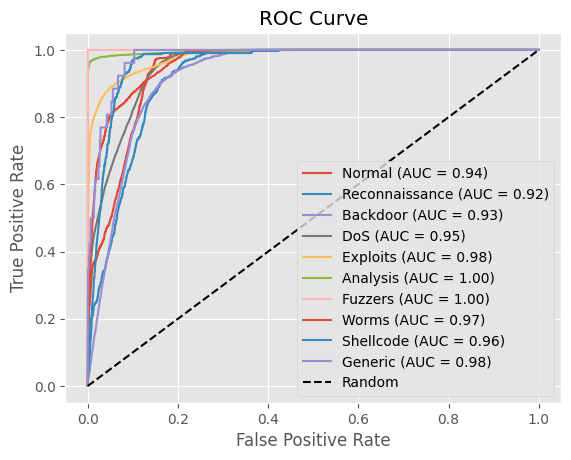

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

# Assuming you have the true labels for the test data as y_test
# Assuming you have the ensemble probabilities from the ensemble model as ensemble_probs

# Convert ensemble probabilities into class labels
ensemble_labels = np.argmax(ensemble_probs, axis=1)

# Convert true labels into one-hot encoded format
y_true = to_categorical(y_test)

# Define the number of classes
num_classes = y_true.shape[1]

# Define class label names
label_names = {
     0: "Normal",
    1: "Reconnaissance",
    2: "Backdoor",
    3: "DoS",
    4: "Exploits",
    5: "Analysis",
    6: "Fuzzers",
    7: "Worms",
    8: "Shellcode",
    9: "Generic"
}

# Calculate the FPR, TPR, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], ensemble_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves in one graph
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='{} (AUC = {:.2f})'.format(label_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
# Save the ROC curve as an image file
plt.savefig('All_roc_curve.png'.format(i))  # Change the file name as desired
plt.close()


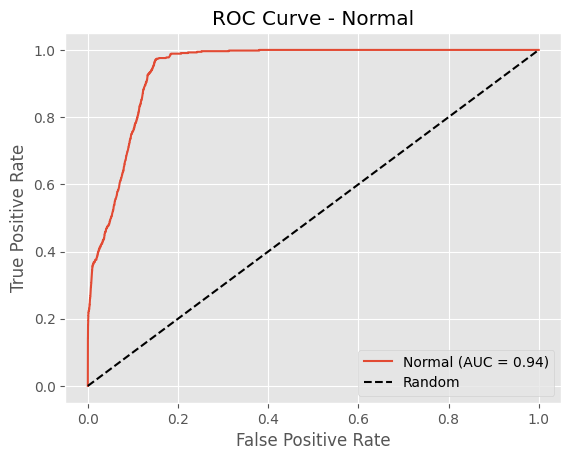

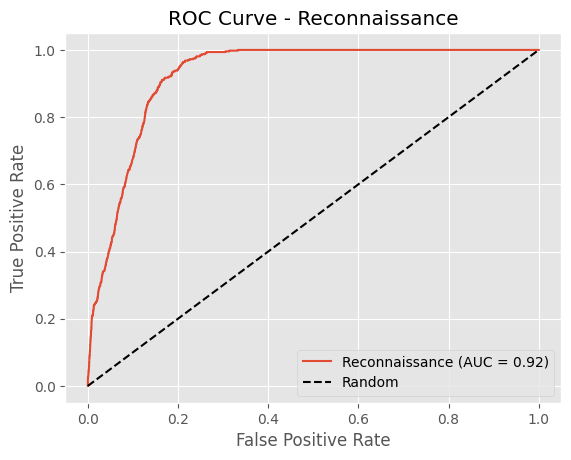

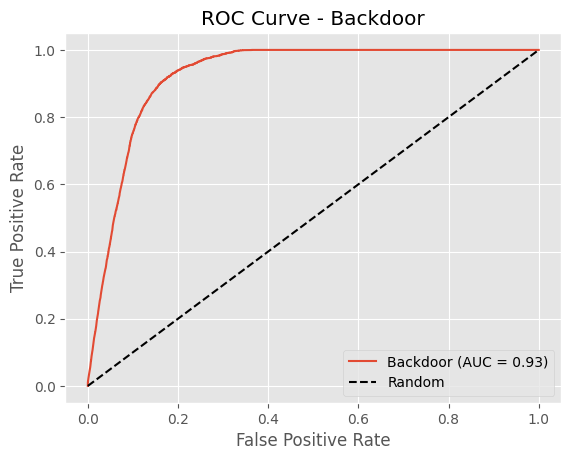

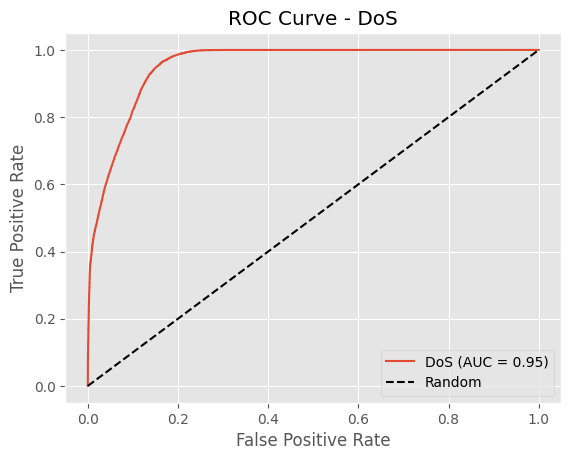

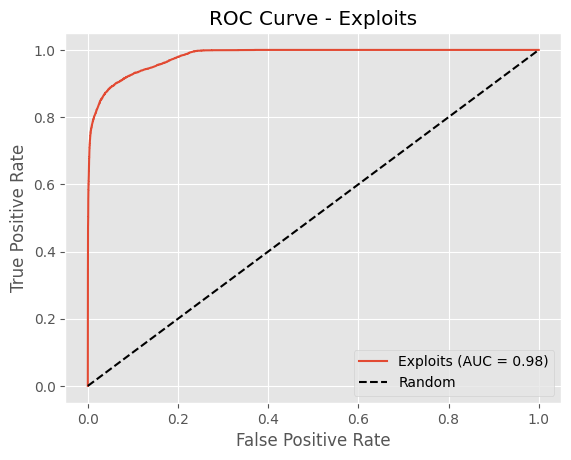

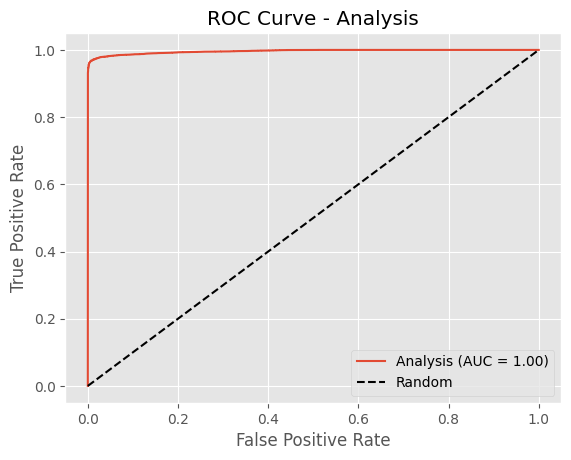

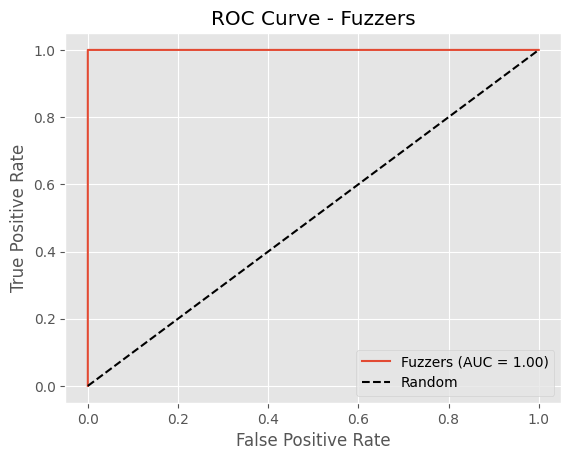

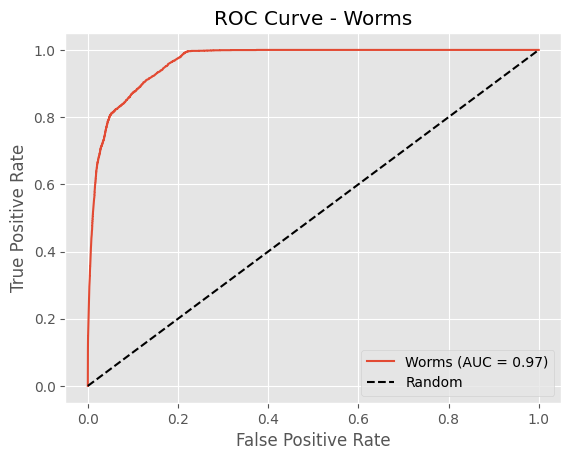

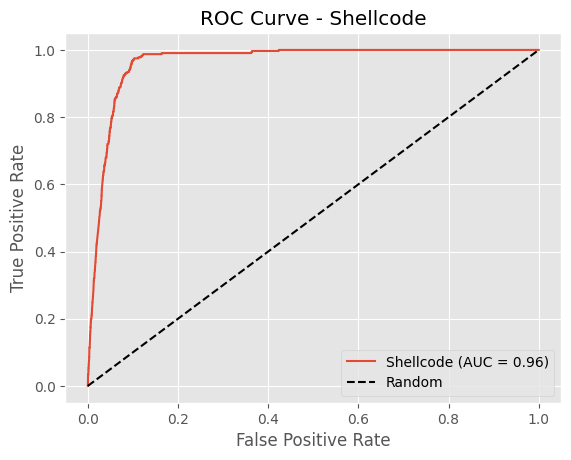

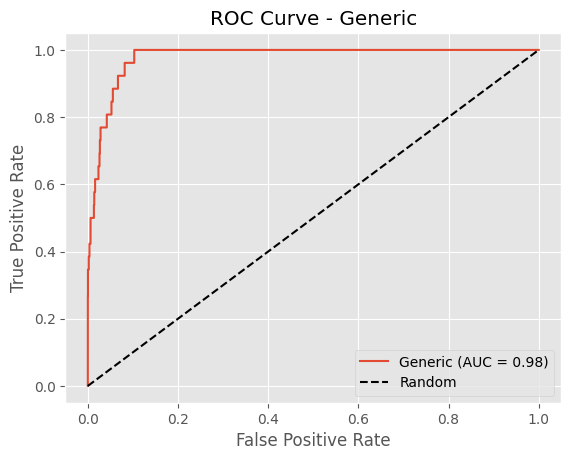

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

# Assuming you have the true labels for the test data as y_test
# Assuming you have the ensemble probabilities from the ensemble model as ensemble_probs

# Convert ensemble probabilities into class labels
ensemble_labels = np.argmax(ensemble_probs, axis=1)

# Convert true labels into one-hot encoded format
y_true = to_categorical(y_test)

# Define the number of classes
num_classes = y_true.shape[1]

# Define class label names
label_names = {
    0: "Normal",
    1: "Reconnaissance",
    2: "Backdoor",
    3: "DoS",
    4: "Exploits",
    5: "Analysis",
    6: "Fuzzers",
    7: "Worms",
    8: "Shellcode",
    9: "Generic"
}

# Calculate the FPR, TPR, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], ensemble_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Plot the ROC curve for each class
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='{} (AUC = {:.2f})'.format(label_names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(label_names[i]))
    plt.legend(loc='lower right')
    plt.show()
    # Save the ROC curve as an image file
    plt.savefig('roc_curve_class{}.png'.format(i))  # Change the file name as desired
    plt.close()



# Performance Marix

In [ ]:
# Evaluate the model on test data
ensemble_loss, ensemble_acc = ensemble_model.evaluate([X_test, X_test_cnn], pd.get_dummies(y_test))

# Get predictions for test data
y_pred = ensemble_model.predict([X_test, X_test_cnn])

# Convert predictions to classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true classes
y_true = y_test

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(20, 20))

# Print metrics
print("Test loss:", ensemble_loss)
print("Test accuracy:", ensemble_acc)
print("Confusion matrix:")
print(cm)


1611/1611 [==============================] - 2s 1ms/step
Test loss: 0.43446752429008484
Test accuracy: 0.8377995491027832
Confusion matrix:
[[   99     0    17   345    46    25     0     6     0     0]
 [    0     1    20   341    67    16     0    26     0     0]
 [    1     0   177  2751   116    52     0   195     1     0]
 [   28     2   144  7631   338    90     0   618     0     2]
 [    9     0    17   722  3698    42     0   254     0     0]
 [    0     0     8   288   123 11373     0    56     0     1]
 [    0     0     0     1     0     0 18674     0     0     0]
 [    3     0    41  1049   151     5     0  1521     0     0]
 [    0     0     0    89    25     0     0   204     0     0]
 [    0     0     0    12     1     5     0     6     0     2]]


<Figure size 2000x2000 with 0 Axes>

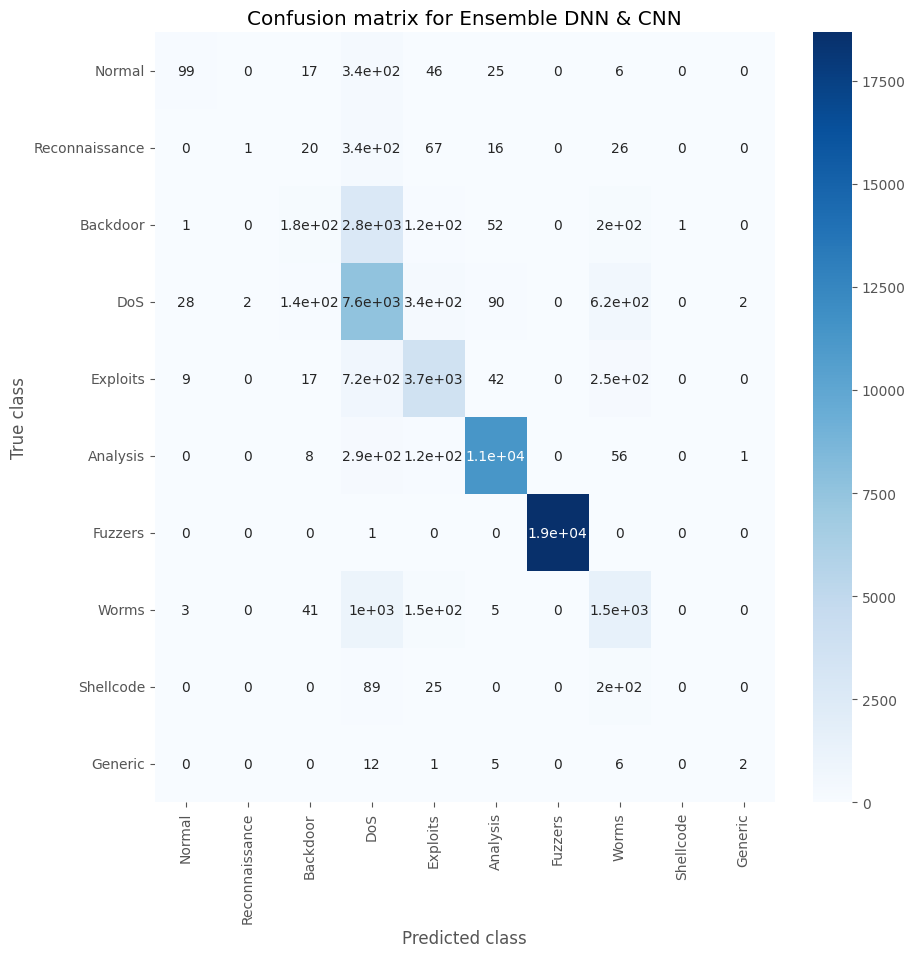

In [ ]:
# Define the class labels for your data
class_labels = ['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic']

plt.figure(figsize=(10, 10))

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix for Ensemble DNN & CNN')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [ ]:
# Evaluate ensemble model
ensemble_loss, ensemble_acc = ensemble_model.evaluate([X_test, X_test_cnn], pd.get_dummies(y_test))
#ensemble_loss, ensemble_acc = ensemble_model.evaluate(X_test, y_test)
#print("Ensemble model - loss: {:.3f}, accuracy: {:.3f}".format(ensemble_loss, ensemble_acc))



# Evaluate the model on test data
y_pred = ensemble_model.predict([X_test, X_test_cnn])
#y_pred = ensemble_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy of the Ensemble Model: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Confusion Matrix of the Ensemble Model:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report of the Ensemble Model:")
print(classification_report(y_test, y_pred))

1611/1611 [==============================] - 2s 1ms/step
Accuracy of the Ensemble Model: 83.78%
Confusion Matrix of the Ensemble Model:
[[   99     0    17   345    46    25     0     6     0     0]
 [    0     1    20   341    67    16     0    26     0     0]
 [    1     0   177  2751   116    52     0   195     1     0]
 [   28     2   144  7631   338    90     0   618     0     2]
 [    9     0    17   722  3698    42     0   254     0     0]
 [    0     0     8   288   123 11373     0    56     0     1]
 [    0     0     0     1     0     0 18674     0     0     0]
 [    3     0    41  1049   151     5     0  1521     0     0]
 [    0     0     0    89    25     0     0   204     0     0]
 [    0     0     0    12     1     5     0     6     0     2]]
Classification Report of the Ensemble Model:
              precision    recall  f1-score   support

           0       0.71      0.18      0.29       538
           1       0.33      0.00      0.00       471
           2       0.42  

In [ ]:
from sklearn.metrics import classification_report

# Get predictions for test data
y_pred = ensemble_model.predict([X_test, X_test_cnn])

# Convert predictions to classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true classes
y_true = y_test

# Generate classification report
report = classification_report(y_true, y_pred_classes)

# Print classification report
print(report)


1611/1611 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.71      0.18      0.29       538
           1       0.33      0.00      0.00       471
           2       0.42      0.05      0.10      3293
           3       0.58      0.86      0.69      8853
           4       0.81      0.78      0.79      4742
           5       0.98      0.96      0.97     11849
           6       1.00      1.00      1.00     18675
           7       0.53      0.55      0.54      2770
           8       0.00      0.00      0.00       318
           9       0.40      0.08      0.13        26

    accuracy                           0.84     51535
   macro avg       0.58      0.45      0.45     51535
weighted avg       0.83      0.84      0.82     51535



In [ ]:
# Define the class labels for your data
class_labels = ['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic']
plt.figure(figsize=(20, 20))

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm/total_samples*100, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix for Ensamble')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test set using CNN model
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# Get confusion matrix for each model
cm_cnn = confusion_matrix(y_test, y_pred_cnn)

'''
# Evaluate DNN model
dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test, y_test)
print("DNN Loss:", dnn_loss)
print("DNN Accuracy:", dnn_accuracy)
'''
plt.figure(figsize=(20, 20))

print("CNN Confusion Matrix:")
print(cm_cnn)

# Predict on test set using DNN model
y_pred_dnn = dnn_model.predict(X_test)
y_pred_dnn = np.argmax(y_pred_dnn, axis=1)

cm_dnn = confusion_matrix(y_test, y_pred_dnn)

'''
# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print("CNN Loss:", cnn_loss)
print("CNN Accuracy:", cnn_accuracy)
'''
plt.figure(figsize=(20, 20))

print("DNN Confusion Matrix:")
print(cm_dnn)


In [ ]:
# Define the class labels for your data
class_labels = ['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic']

total_samples = sum(sum(cm_cnn))

plt.figure(figsize=(20, 20))

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm_cnn/total_samples*100, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix for CNN')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()




# Define the class labels for your data
class_labels = ['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic']

total_samples = sum(sum(cm_dnn))d

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm_dnn/total_samples*100, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix for DNN')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [ ]:
# predict the test set using the ensemble model
y_pred = ensemble_model.predict([X_test, X_test_cnn])

# convert the predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

# convert the test set labels to class labels
y_true = np.argmax(pd.get_dummies(y_test).values, axis=1)

# calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# calculate the classification report
cr = classification_report(y_true, y_pred)
print("Classification Report:\n", cr)

# calculate the area under the ROC curve
y_prob = ensemble_model.predict_proba([X_test, X_test_cnn])
fpr, tpr, thresholds = roc_curve(y_true, y_prob[:,1])
roc_auc = auc(fpr, tpr)
print("Area Under the ROC Curve:", roc_auc)

# calculate the recall, precision, and F1 score
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# calculate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
